In [1]:
# !pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [3]:
data = pd.read_csv('data/Placement_Data_Full_Class.csv')

# Remove serial number
data.drop("sl_no", axis=1, inplace=True)

## Examining Dataset

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
print("The shappe of the data is (row, column): "+str(data.shape))
print(data.info())

The shappe of the data is (row, column): (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [6]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)

report

## Data Cleaning / Handling Missing Values

In [7]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with numm values:',
      data['salary'].isnull().sum(),
      sep='\n')

Salary column with numm values:
0


## Exploring Data by each Features(Optional)

In [8]:
"""
Feature: Gender

Does gender effect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


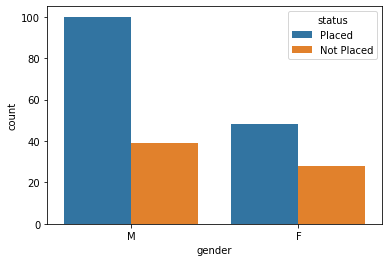

In [9]:
sns.countplot("gender", hue="status", data=data)
plt.show()

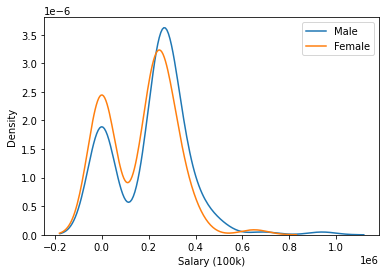

In [10]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])

plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


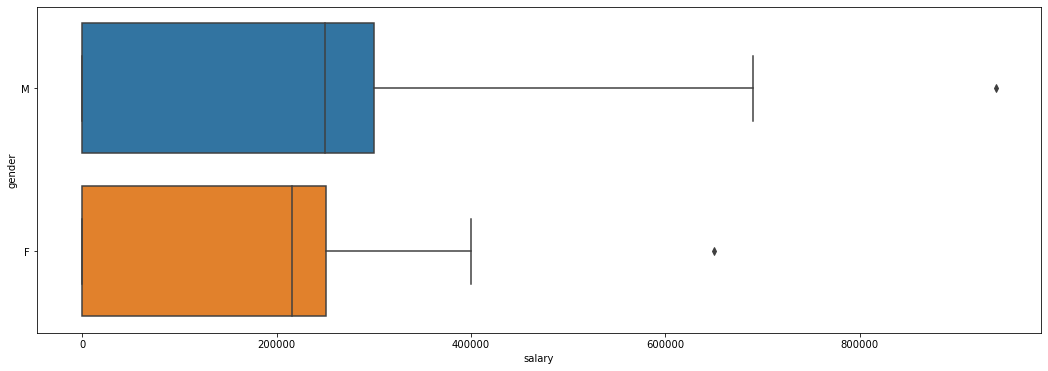

In [11]:
plt.figure(figsize=(18,6))

sns.boxplot("salary", "gender", data=data)
plt.show()

Insights
- Kami memiliki sampel 139 siswa laki-laki dan 76 siswa perempuan.
- 30 siswa perempuan dan 40 siswa laki-laki tidak ditempatkan. Siswa laki-laki memiliki penempatan yang relatif tinggi.
- Siswa laki-laki ditawari gaji yang sedikit lebih besar daripada rata-rata siswa perempuan.

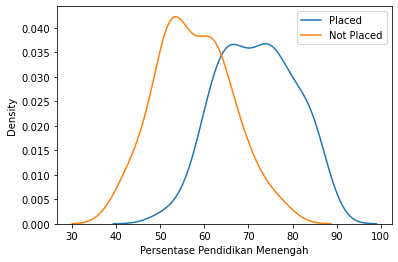

In [12]:
"""
Feature: ssc_p(Persentase Pendidikan Menengah),
         ssc_b(Board of Education)

Apakah Pendidikan Menengah memengaruhi penempatan?
"""

sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])

plt.legend(["Placed", "Not Placed"])
plt.xlabel("Persentase Pendidikan Menengah")

plt.show()

- Semua siswa dengan Persentase Pendidikan Menengah di atas 90% ditempatkan
- Semua siswa dengan Persentase Pendidikan Menengah di bawah 50% tidak ditempatkan
- Siswa dengan Persentase Pendidikan Menengah yang baik ditempatkan rata-rata

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


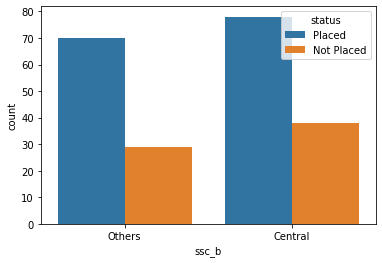

In [13]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

Board of Education tidak banyak mempengaruhi Placement Status.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


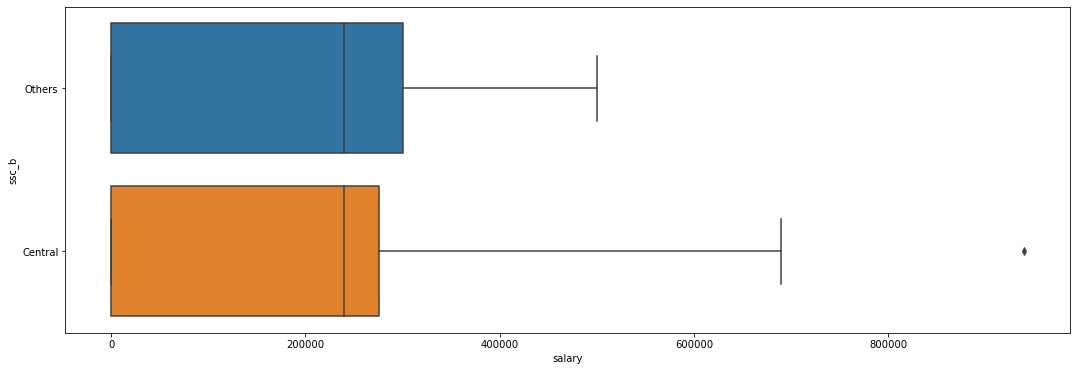

In [14]:
plt.figure(figsize=(18,6))

sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers terdapat pada keduanya tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


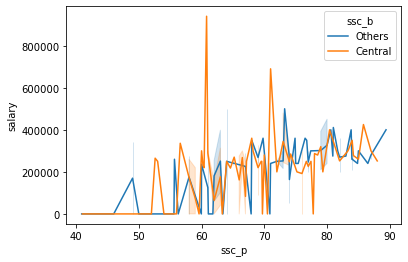

In [15]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

- Tidak ada pola khusus (correlation) antara Persentase Pendidikan Menengah dan Salary. 
- Board of Education tidak mempengaruhi gaji.

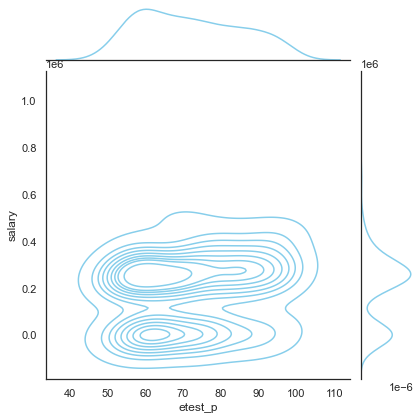

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

- Sebagian besar kandidat yang mendapat skor sekitar 60 persen mendapat paket yang layak sekitar 3 lakh PA
- Tidak banyak kandidat yang menerima gaji lebih dari 4 lakh PA
- Bagian padat bawah menunjukkan kandidat yang tidak ditempatkan

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

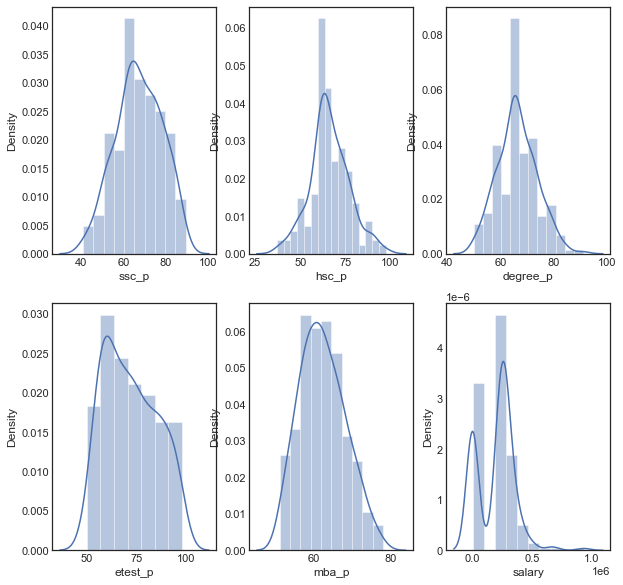

In [17]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')

plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

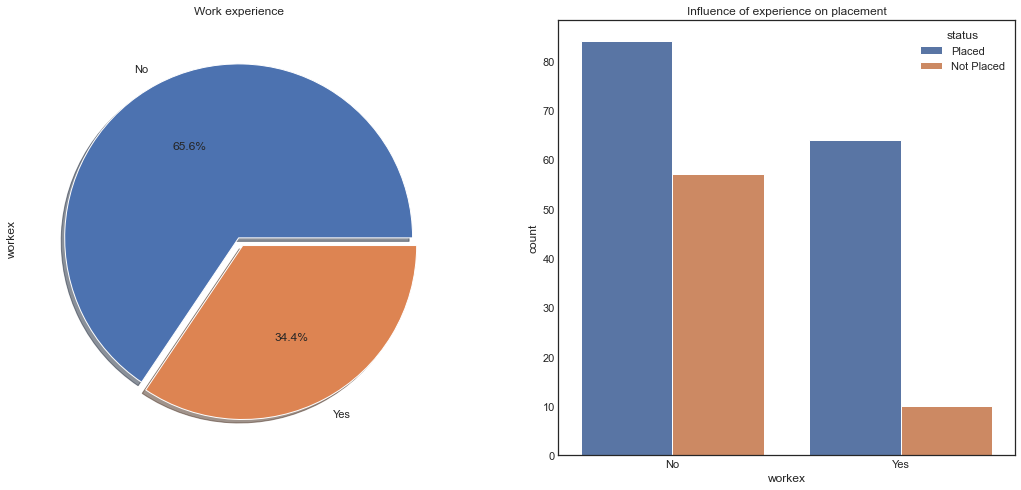

In [18]:
plt.style.use('seaborn-white')

f, ax = plt.subplots(1, 2,
                     figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0, 0.05],
                                       autopct='%1.1f%%',
                                       ax=ax[0],
                                       shadow=True)
ax[0].set_title("Work experience")
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title("Influence of experience on placement")

plt.show()

## Preprocessing data of classification models

In [19]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [20]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=4)

In [23]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8307692307692308
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



In [24]:
# Using Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8769230769230769
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



In [25]:
# Using Logistic Refression

logR = LogisticRegression(solver='lbfgs')
logR.fit(X_train, y_train)

y_pred = logR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



## Getting ready for deployment

<b>Pickle</b>

In [26]:
pickle.dump(random_forest,
            open('model_classifier.pkl', 'wb'))